In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, set_matplotlib_formats
import myst_nb

import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'plotly_mimetype+svg'
pio.templates['book'] = go.layout.Template(
    layout=dict(
        margin=dict(l=10, r=10, t=10, b=10),
        autosize=True,
        width=350, height=250,
    )
)
pio.templates.default = 'seaborn+book'

set_matplotlib_formats('svg')
sns.set()
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [2]:
_clear = ['bingroup']

def _clear_props(traces):
    for trace in traces:
        for prop in _clear:
            if hasattr(trace, prop):
                trace.update({prop: None})

def left_right(left, right, width=700, height=250, **kwargs):
    fig = make_subplots(cols=2, **kwargs)
    fig.update_layout(width=width, height=height)
    
    t1 = list(left.select_traces())
    t2 = list(right.select_traces())
    _clear_props([*t1, *t2])
    fig.add_traces(t1, rows=1, cols=1)
    fig.add_traces(t2, rows=1, cols=2)
    return fig

def margin(fig, **kwargs):
    return fig.update_layout(margin=kwargs)

def to_plotly_text(text):
    return text.strip().replace('\n', '<br>')

In [3]:
run = (pd.read_csv('data/100m_sprint.csv', parse_dates=['date'])
       .assign(year=lambda df: df['date'].dt.year))

(ch:viz_context)=
# Adding Context


When preparing a visualization for publication, it's important to
add additional context to the plot.
We can do this by highlighting marks, using color, and adding labels to
specific points in the plot.
We often aim to have enough context in our plots so that they can stand
alone---a reader should be able to get the gist of each plot without needing
additional explanation elsewhere.
That said, every element of a statistical graph should have a purpose. 
Superfluous text or
plot features, often referred to as “chartjunk”, should be eliminated.
In this section, we'll provide a brief overview of ways we can add helpful
context to our plots.
Then, we'll provide an example where we recreate a publication-ready plot
by adding context.

+ *Reference Markers*. 
Reference points and lines can provide benchmarks,
historical values, and other external information to compare our data against
and help interpret the results.
For example, we often add a reference line with slope 1 to a quantile-quantile
plot.
We might also add a vertical line on a time-series plot to mark a special
event, like a natural disaster.

+ *Labels.*
It is good practice to consistently use informative labels on tick
marks and axes.
For example, axis labels often benefit from 
including units of measurement.
Our graphs should contain
titles and legends when needed.
Informative labels are especially important
for plots that other people will see and interpret.
However, even when we're doing exploratory data analysis 
we often want
to include enough context so that when we return to an analysis we can easily
figure out what we plotted.

+ *Captions*.
Plot captions serve several purposes. They describe what has been
plotted and orient the reader.
Captions also point out the important features
of the plot and their implications.
It's okay for the caption to repeat
information found in the text.
Readers often skim an article and focus on
section headings and visualizations so plot captions should be self-contained.

## Example: 100m Sprint Times

Let's look at an example of adding context.
We'll recreate a plot featured in a 538 article about the Olympic
100-meter sprint {cite}`planos2021`.
We have a dataset of race times, and we'll create a basic scatter plot
showing race time against year.

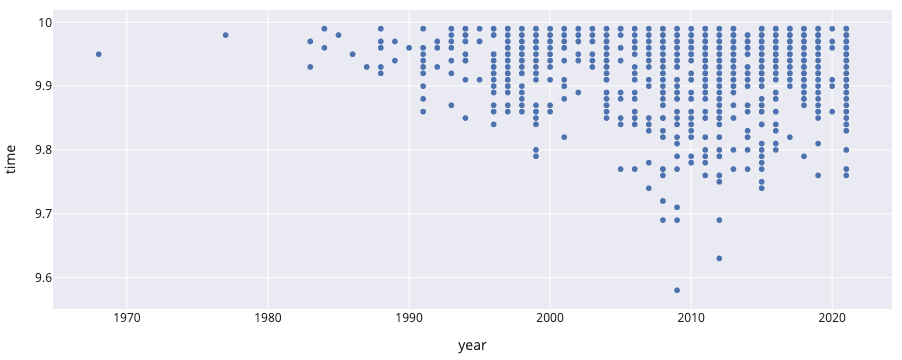

In [4]:
fig = px.scatter(run, x='year', y='time', hover_name='name',
                 width=450, height=250)
fig

When we want to prepare a plot for other people, it's important to first think
about the plot's takeaway message.
In this case, the main story is that Usain Bolt's world record time of 9.58
seconds is still untouched.
In fact, the second-best race time also belongs to Bolt.
So, we'll add context to this plot by adding a title that directly states 
the main takeaway.
We'll also add a caption describing the data, and highlight several outlier
points in the scatter plot, including the two best race times that belong
to Usain Bolt.

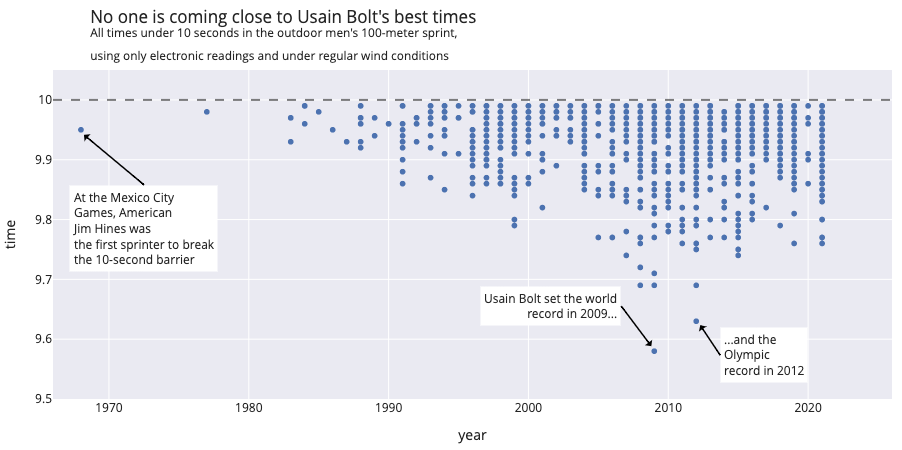

In [41]:
title = to_plotly_text('''
No one is coming close to Usain Bolt's best times
<sup>All times under 10 seconds in the outdoor men's 100-meter sprint,
using only electronic readings and under regular wind conditions</sup>
''')

fig = px.scatter(run, x='year', y='time', hover_name='name',
                 width=550, height=450)
fig.update_yaxes(range=[9.5, 10.05])
fig.update_xaxes(range=[1966, 2026])
margin(fig, t=70)
fig.update_layout(title=dict(text=title, y=0.95, x=0.1))

fig.add_hline(y=10.0, line_width=2, line_dash="dash", line_color="black")


hines = to_plotly_text('''
At the Mexico City
Games, American
Jim Hines was
the first sprinter to break
the 10-second barrier
''')

anno_params=dict(bgcolor='white',
                 borderpad=3,
                 arrowcolor='black',
                 showarrow=True,
                 arrowwidth=1.5)

fig.add_annotation(x=1968, y=9.95,
                   ax=60,
                   ay=50,
                   xshift=3,
                   yshift=-5,
                   yanchor='top',
                   text=hines,
                   align='left',
                   **anno_params)

fig.add_annotation(x=2009, y=9.58,
                   ax=-30,
                   ay=-40,
                   xshift=-3,
                   yshift=5,
                   xanchor='right',
                   text='Usain Bolt set the world<br>record in 2009...',
                   align='right',
                   **anno_params)

fig.add_annotation(x=2012, y=9.63,
                   ax=20,
                   ay=30,
                   xshift=4,
                   yshift=-4,
                   xanchor='left',
                   text='...and the<br>Olympic<br>record in 2012',
                   align='left',
                   **anno_params)

fig

These bits of context let readers 
understand the reason why the plot is useful,
describe what we decided to plot, and point out
several interesting facts about the data. 
This plot can now be a useful part of a slideshow, a technical report,
or a social media post.
In our experience, other people who look at our data analyses
remember our plots, not paragraphs of text or equations.
So, it's important to go the extra mile and add context to the plots we
prepare for others.

## Takeaways

This section covered a few useful ways to add context to a plot through the
plot's title, caption, and annotations. In the next section, we'll move on
to practical ways to create plots in Python.